In [2]:
import json
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

<Complaint estimation>

Hypothesis : Users tend to send tweets to airlines when they have complaint.
    
Estimation method : The number of tweets airlines received from the users. 
It will be calculated by counting the number of ‘@airline_name’ in users’ text; for example, @AmericanAir or @British_Airways.

This hypothesis will be investigated using sentimental analysis later. 

Factors that should be considered later;
1. Company size ( Bigger company having more  customers must recieve more direct tweets) 
2. whether it is low-cost airline ( low-cost airlines might have more complaints)
3. contries with the most twitter users ( If airlines are based on country with the most twitter users, they would receive more tweets than airlines in country with the least twitter users)

In [3]:
data = pd.read_csv("d.csv")

In [23]:
data[['text']]

,text
0,@easyJet It is impossible to get in contact wi...
1,So @AmericanAir @EWRairport lied to an old lad...
2,☀ Prázdninové letenky na Faerské ostrovy k srp...
3,"@BilalEksiTHY TK Elite Plus Helpdesk'e, Luftha..."
4,"@AmericanAir, I should be on a flight to LA, i..."
5,@Ryanair can I add luggage fees to a flight th...
6,Boeing 737 de @AmericanAir\n\n#boeing737 #avge...
7,@goody_tracy @Raoulkitty @JonesDay @Macys @Ame...
8,@PAOLANURNBERG @stanzaselvaggia Questo è il co...
9,@Pelusitaaaa1 Hoi! Enkel KLM/Air France-vluch...


In [135]:
airlines = {'KLM':56377143, 
            'AirFrance': 106062176, 
            'British_Airways': 18332190, 
            'AmericanAir': 22536055, 
           'Lufthansa': 124476322, 
           'AirBerlin': 26223583, 
           'AirBerlinAssist': 2182373406, 
           'easyJet': 38676903, 
           'RyanAir': 1542862735, 
           'SingaporeAir': 253340062, 
           'Qantas': 218730857, 
           'EtihadAirways': 45621423, 
           'VirginAtlantic': 20626359}

list(airlines.keys())
airline_names = ["@" + s for s in list(airlines.keys())]

['KLM',
 'AirFrance',
 'British_Airways',
 'AmericanAir',
 'Lufthansa',
 'AirBerlin',
 'AirBerlinAssist',
 'easyJet',
 'RyanAir',
 'SingaporeAir',
 'Qantas',
 'EtihadAirways',
 'VirginAtlantic']

In [109]:
# The number of how many direct tweets each airline had from users.
airline_lst = []
for i in airline_names:
    airline_lst.append(data['text'].str.contains(i).sum())

airline_df = pd.DataFrame(columns=['airline', 'received tweets'])
airline_df['airline'] = list(airlines.keys())
airline_df['received tweets'] = airline_lst
airline_df

,airline,received tweets
0,KLM,71804
1,AirFrance,10704
2,British_Airways,199560
3,AmericanAir,271696
4,Lufthansa,8799
5,AirBerlin,4
6,AirBerlinAssist,0
7,easyJet,121297
8,RyanAir,178
9,SingaporeAir,20274


In [133]:
airline_sorted = airline_df.sort_values('received tweets', ascending=False)
airline_sorted

,airline,received tweets
3,AmericanAir,271696
2,British_Airways,199560
7,easyJet,121297
0,KLM,71804
12,VirginAtlantic,48412
10,Qantas,47895
9,SingaporeAir,20274
11,EtihadAirways,15803
1,AirFrance,10704
4,Lufthansa,8799


Text(0.5, 1.0, 'The number of received tweets of each airline from users')

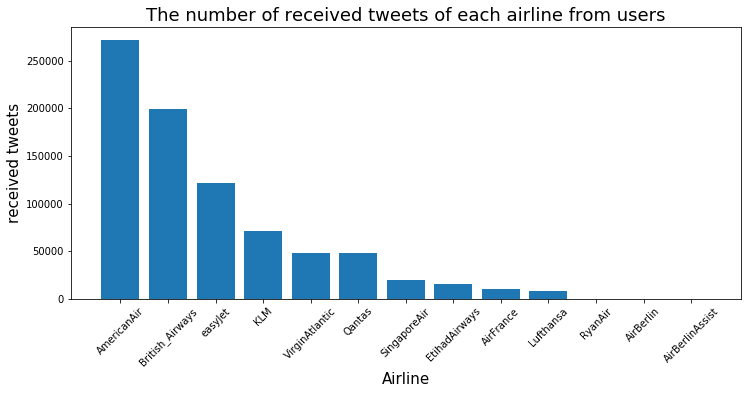

In [143]:
airline_sorted = airline_df.sort_values('received tweets', ascending=False)
airline_sorted

plt.figure(figsize=(12,5))
plt.bar(airline_sorted['airline'], airline_sorted['received tweets'])
plt.xlabel("Airline", size=15)
plt.ylabel("received tweets", size=15)
plt.xticks(rotation='45')
plt.title("The number of received tweets of each airline from users", size=18)
